# Introduction 

A __neural network__ is a method in the field of machine learning used to build predictive models to help to solve complex tasks. By exposing the network to a large amount of training data, we can train it to approximate any arbitrary input-output function. 

The basic building blocks are functional modules known as nodes or "neurons", which take in an input, apply a mathematical operation, and produce an output. The network consists of many layers of these neurons; the outputs of one layer are fed as inputs to the next. By stacking the layers together, the input-output mapping can become arbitrarily complex. The aim is to refine the network to map inputs to the desired outputs. This is done by adding a weight and a bias to each node, and gradually adjusting these to get closer and closer to a desired output.



## The XOR problem

The idea behind the XOR, or "exclusive or" problem, is to use a neural network to predict the outputs of an XOR logic gate given two binary inputs. An XOR function should return a true value if the two inputs are not equal, and a false value if they are equal. All possible inputs and predicted outputs are shown in _Figure 1_ :


![Figure 1](img/XOR.png "XOR truth table")

We can define these inputs and outputs using the following numpy arrays:



In [80]:
# Create input array (x) and output array (y)

import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0], 
              [0, 1],
              [1, 0],
              [1, 1]]) 

y = np.array([[0,1,1,0]]).T


If we colour the inputs (A and B) according to their classification, we see that the decision boundary for correct classification is not linear. That is, we cannot split the two categories with a single straight line.

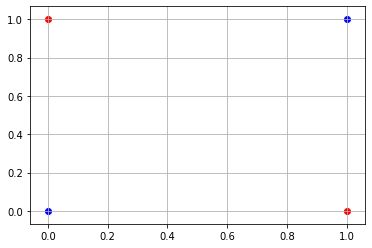

In [81]:
plt.grid()

for i in range(len(x)):
    c = 'r'
    if y[i] == 0:
        c = 'b'
    plt.scatter([x[i][0]], [x[i][1]], c=c)

# Perceptrons

The simplest neural network is known as a _perceptron,_ invented by Rosenblatt in 1958. They have just one input and one output layer. The activation function commonly used is a _step function,_ which converts the result to either a 1 or a 0. The network hence performs binary classification.

We can visualise the architecture of a perceptron in _Figure 2_ :

![Figure 1](img/perceptron.png "Perceptron")

Although they once appeared promising, perceptrons are limited in their function. They are only capable of solving problems which are linearly separable. Hence, they cannot solve the XOR problem.

# Multilayer Perceptrons 

The solution is to expand beyond the single-layer architecture by adding another layer of units, known as the 'hidden layer'. This is known as a _multilayer perceptron (MLP)._ An MLP can have any number of hidden layers, and any number of units in each layer. They are fully connected, meaning all the nodes from the current layer are connected to the next. The presence of a hidden layer is exactly what allows the network to learn non-linear mappings; the first layer combines the inputs, and the second layer maps these combinations of inputs to the output.

We can visualise the architecture thus:

![Figure 2](img/multilayer.png "Multilayer Perceptron")


The activation function used in MLPs is a nonlinear function - typically the __sigmoid function__ - which compresses the result to any continuous value between 0 and 1. Instead of performing a discrete binary classification, this therefore gives the probability of an input belonging to a certain class. 

The sigmoid function, which we will use in implementing the MLP, is defined as follows:

## $$σ(z) = \frac{1}{1 + e^{-z}}$$

And its __derivative__ - which we will need later - is the following:

## $$σ'(z) = z(1-z)$$

We will write the sigmoid function, along with its derivative, using the following code. We will also plot both functions to visualise their behaviour. Note how negative values are compressed toward 0, and positive values  to 1. 


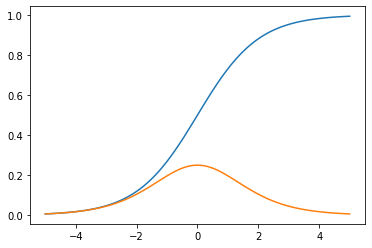

In [26]:
# Define sigmoid function and its derivative 

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
    return z*(1-z)

# Visualise the function

z = np.linspace(-5, 5, 100)
plt.plot(z, sigmoid(z))
plt.plot(z, sigmoid_prime(sigmoid(z)))

# Forward propagation 

The first stage of a neural network algorithm is _forward propagation_. This is the process of generating an output prediction given the inputs. The prediction is arbitrary at first; it will be improved with training.


An MLP performs multiple linear classifications in parallel, one for each of the C output classes. We therefore need a weight vector $(w_1,w_2,…,w_C)$ and a bias value $(b_1,b_2,…,b_C)$ for each class. The output $\hat{y}$ of the perceptron should be a $C$-dimensional vector, whose entries contain the probability of the respective class:

### $$\begin{equation*}
\hat{y} = 
\begin{pmatrix}
σ(w_1^Tx + b_1) \\
σ(w_2^Tx + b_2) \\
... \\
σ(w_C^Tx + b_C)
\end{pmatrix}
\end{equation*}$$


To do this efficiently, we can arrange the weight vectors in a matrix $W$, of dimensions ($d × C$), where $d$ is the dimensionality of the input dataset. We can also arrange the bias values in a vector $b$ of length $C$:

### $W=(w_1,w_2,…,w_C)∈\mathbb{R}^{d×C}$ 


### $\vec{b}=(b_1,b_2,…,b_C)^T∈\mathbb{R}^C$

The __output__ is obtained by computing the dot product of the input matrix with the weight matrix $W$, adding the bias vector $\vec{b}$, and applying the sigmoid function element-wise. 

The computation is therefore:

### $$f(x) = σ (xW + \vec{b})$$

### Batch computation 

The matrix form allows to enter more than one data point at a time. Instead of a single point $x$, we can feed in a matrix $X∈\mathbb{R}^{Nxd}$ containing one point per row. So there are $N$ rows of d-dimensional points. Instead of $xW$, we compute the matrix multiplication $XW$. This returns an $N × C$ matrix, with each row containing $xW$ for each data point $x$. To each row, we add a bias vector, which is now a $1 × m$ row vector. 

The forward propagation through the network is therefore essentially performing:

### $$f(X) = σ (XW + \vec{b})$$



# Backpropagation 

Before training, the network makes random predictions which are far from correct. Backpropagation is the method used to incrementally update the weights in order to train the network. First, the output from forward propagation is compared with the desired output value to obtain the _error_ in the prediction. We then use the optimisation method of _gradient descent_ to incrementally adjust all the weights in the network in the direction which reduces this error. The process is iterated until the predictions converge to the desired output. 

The process can be summarised in two stages:

### Step 1.  Calculate the error 

We find the error or "cost" of the network's prediction by taking the difference between predicted and actual output. A common "cost function" used to do this is the _mean squared error (MSE)_. It is defined thus:

### $$ MSE = \frac{1}{n}\sum_{i=1}^{n}(predicted - observed)^2 $$

Where $n$ is the number of observations.

### Step 2.   Minimise the cost

Secondly, we need to minimise the cost function by finding the optimum combination of weights and biases across the network. To do this, we use the _gradient descent algorithm_. First, we calculate the partial deriative of the cost function with respect to each weight and bias. We then subtract the result from the current weights to get the updated weights at the next time step.

To be explicit, let us denote the MSE cost function as $C$, and keep the desired output as $y$ and the predicted output as $\hat{y}$. At each iteration, we then have:

### $$ C = \sum_{i=1}^{n}(y - \hat{y})^2$$

The __partial derivative__ of $C$ with respect to each weight $W$ can be expressed using the chain rule as:

### $$\frac{\partial{C}}{\partial{W}} = \frac{\partial{C}}{\partial{\hat{y}}} * \frac{\partial{\hat{y}}}{\partial{{z}}} * \frac{\partial{z}}{\partial{W}}$$

Here, $z$ is the activation $Wx + b$, before being activated by the sigmoid function.

We know, analytically, all three terms of this equation:

### $$\frac{\partial{C}}{\partial{\hat{y}}} = 2(y - \hat{y}) \;, \;\;\;  \frac{\partial{\hat{y}}}{\partial{z}} = z(1-z) \;, \;\;\;  \frac{\partial{z}}{\partial{W}} = x$$

 
And thus can re-express as:

### $$\frac{\partial{C}}{\partial{W}} = 2(y - \hat{y}) * z(1-z) * x$$

This allows us to  calculate the __partial derivative of the loss function__ with respect to the weights explicitly. We then increment the weights by adding the dot product of the output of each layer with this partial derivative.


# Implementing an MLP to solve the XOR problem 


With this theoretical background in place, let us now code a simple MLP, with one hidden layer, capable of solving the XOR problem. We already have our activation function, input data and output data defined. The next step is to create the __weights and biases__. For this simple implementation, we will incorporate the biases into the weights as a __-1__ term. To make the code explicit at this stage, we will define the weights between the input-hidden and hidden-output layer as two separate variables, __W0__ and __W1.__

In [30]:
# Seed random numbers to make the output of the calculations deterministic 

np.random.seed(1)

# Obtain dimensions of input array

l = len(x)           # Number of output classes, C
l1 = len((x)[0])     # Dimensionality of input dataset, d

# Initialise weight matrices W0 and W1

W0 = 2*np.random.random((l1, l)) - 1  # dxC matrix of weights from input to hidden layer
W1 = 2*np.random.random((l, 1)) - 1  # Cx1 matrix of weights from hidden to output layer 

Let us then create the __training loop__. First we perform forward propagation, then backpropagation. We run it over a large number of iterations (in this case, 50'000). 

In [31]:
# Set the number of iterations to perform

iterations = 50000

# Create the training loop 

for j in range(iterations):
    l0 = x                            # Set the first layer, l0, equal to the training data 
    l1 = sigmoid(np.dot(l0, W0))      # Set the hidden layer, l1, equal to the result of forward propagation on the first layer
    l2 = sigmoid(np.dot(l1, W1))      # Set the output layer, l2, equal to the result of forward propagation on the second layer
    
    # Calculate the error between the predicted and desired output
    
    l2_error = y - l2
    
    # Print the MSE every 10000 iterations, to visualise the improvement over time
    
    if j%10000 == 0:
        MSE = np.mean(np.abs(l2_error))
        print("Error: " + str(MSE))
        
    # Backpropagate the error through l2 and l1 to obtain how each l1 output contributes to the l2 error 
    
    l2_delta = l2_error * sigmoid_prime(l2) 
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * sigmoid_prime(l1)    # Produces a greater value for l1 values which contribute more greatly to the error 
    
    # Update the weights in a manner which aims to counteract the error they produce 
    
    W1 += np.dot(l1.T, l2_delta)    # If the weights contribute a lot to the error in their layer, the update is a large in the opposite direction to the error, and vice versa
    W0 += np.dot(l0.T, l1_delta)

Error: 0.4995289647766772
Error: 0.018951601482048636
Error: 0.012674637262799143
Error: 0.010027680242236311
Error: 0.00850592237103725


We can observe the error decreasing progressively over the iterations. Let's now print the network's output prediction after 50'000 iterations. We can print the desired output, y, as a reminder of what we're aiming for.

In [54]:
print("Desired output: ")
print(y)

print("\n" + "Output after training:")
print(l2)

Desired output: 
[[0]
 [1]
 [1]
 [0]]

Output after training:
[[0.00886467]
 [0.99345174]
 [0.9920439 ]
 [0.00662409]]


We see that the network's predictions have converged to be very close to our desired outputs. In other words, the MLP has learned to correctly classify the inputs in the truth table of the XOR problem. Indeed, if we round the outputs to their nearest integer, we can see this more clearly:

In [78]:
print("Rounded output after training: ")
print(np.rint(l2))

Rounded output after training: 
[[0.]
 [1.]
 [1.]
 [0.]]


# Conclusion 


To conclude, I would like to summarise what this project has achieved. After a brief introduction to the __XOR problem,__ we have explored the theoretical background behind the computational architecture capable of solving it, the __multilayer perceptron__ - as well as its precursor, the more simple __perceptron.__ After exploring the basic mathematical principles behind __forward propagation__ and __backpropagation,__ we then trained a simple 3-layer MLP architecture on the classification problem of XOR. We have shown that the network has can achieve an adequate classification of the inputs after 50'000 training iterations. We have also visualised the reduction in error over time. Using this code, we can experiment with various parameters such as the weight initialisations and number of training iterations, to explore the nature of how the network behaves. It would be interesting to extend the implementation to include separate __bias vectors,__ an incremental weight update via a __learning rate__, or perhaps a different nonlinear activation function such as a __ReLu.__



# Evaluation 

To wrap up, some words about my personal experiences with this project. Although it may not appear as such, this endeavour was a huge undertaking for me. I spent an enormous amount of time immersing myself in the hype of neural networks, consuming resource after resource, following what appeared to be a never-ending chain of potential information. Since the field has exploded so much in recent years, there is an enormous amount of content online - web tutorials, books, mini-series, video tutorials, online courses - each proposing their own angle of attack. This was both a blessing and a curse for me. It was extremely useful to have such a wealth of perpectives, and such scope of examples to learn from - but it was also extremely overwhelming to navigate, and left me always burrowing down rabbit holes that were difficult to emerge from. I would spend days reading different angles of explanation from different disciplines, and experimenting with architectures that were all supposed to be doing the same thing, but didn't match. Ultimately, I have still not been able to fully synthesise the common ground between them. This is why I ended up limiting myself to the overly-simplistic result we find here, instead of 'feigning' a mastery of what to me is still unclear. My small fear is that such a result is not reflective, and does not fully 'do justice' to the amount of work that was involved in reaching this point - but this should hardly be a matter of concern.

Ultimately, I am extremely happy to have carried out this project, and am grateful to PCBS for the excuse to spend time on something I have been wishing to explore deeply. I enjoyed immensely the process of discovery, immersion, and sometimes complete 'burial' in something which has for a long time been a black box. I especially enjoyed getting to grips with the calculus of backpropagation and spending hours getting lost in the dimensionality of different matrices. Most pages of my notebooks are now covered in some form of lines and dots. But, I shall be grateful, for my basic linear algebra intuitions have greatly improved as a result - something which is personally crucial from here on out. I also hugely enjoyed learning the basics of LaTeX for the purposes of the Jupyter Notebook write-up, which I have been wishing to do for some time. Now I am extremely motivated to improve my efficiency in both LaTeX and markdown, recognising how useful and streamlined they can be. Finally, I look forward to making slow but sure progress in Python - and continuing to be motivated, and hopefully not paralysed, by the recognition of how much I do not know. 